# Naive Bayes And Sentiment Classification - AI Project 03- Mohsen Amjadi - 810896043

Many language processing tasks involve classification. In this project we apply the naive
Bayes algorithm to text categorization, the task is assigning a label or category to an entire text or document.

sentiment analysis is the extraction of sentiment, the positive or negative orientation that a writer expresses toward some object. a comment on a product expresses the author's sentiment toward the product. one of the versions of sentiment analysis is a binary classification task, and the words of the review provide excellent cues. in this project we have recommended and not recommended classes for comments of the DigiKala products.

Most cases of classification in language processing are done via supervised machine learning. In supervised learning, we have a data set of input observations(here comment_train), each associated with some correct output (a ‘supervision signal’). The goal of the algorithm is to learn how to map from a new observation (comment_test) to a correct output.
Our goal is to learn a classifier that is capable of mapping from a new document d to its correct class c ∈ C. 
A probabilistic classifier additionally will tell us the probability of the observation being in the class.
Generative classifiers like Naive Bayes build a model of how a class could generate some input data. Given an observation, they return the class most likely to have generated the observation.

We use a text document as if it were a bag-of-words, that is, an unordered set of words with their position ignored, keeping only their frequency in the document. 


In [252]:
import csv
import re

RECOMMENDED = "recommended"
NOT_RECOMMENDED = "not_recommended"
not_recommended_count = 0
recommended_count = 0
not_recommended_all_words_count = 0
recommended_all_words_count = 0
words_set = set()
data_set = list()
with open("./CA3_dataset/comment_train.csv", encoding="utf8") as csvfile:
            csvreader = csv.reader(csvfile, delimiter=",")
            next(csvreader)
            data_size = 0
            for title, comment, recommend in csvreader:
                comment = re.split(' |\u200c', comment)
                data_size += 1
                data_set.append([comment, recommend])
                
data_size

6000

In [253]:
test_set = list()
with open("./CA3_dataset/comment_test.csv", encoding="utf8") as csvfile:
            csvreader = csv.reader(csvfile, delimiter=",")
            next(csvreader)
            test_size = 0
            for title, comment, recommend in csvreader:
                comment = re.split(' |\u200c', comment)
                test_size += 1
                test_set.append([comment, recommend])
                

test_size

800

Naive Bayes is a probabilistic classifier, meaning that for a document d, out of all classes c ∈ C the classifier returns the class cˆ which has the maximum posterior probability given the document.

$$ \hat c = \underset{c \in C}{argmax} \text{ } P(c \mid d) $$

so here the 
<b>Posterior $P(c|d)$  </b>Probability is Probability of a word belonging to our recommended or not recommended class given the word.
with that we could set the (recommend OR not recommended) class for comments of a new set of words.

The intuition of Bayesian classification is to use Bayes’ rule , that is presented below:

$$ P(x \mid y) = \frac{P(y \mid x) \, P(x)}{P(y)} $$

it gives us a way to break down any conditional probability P(x|y) into three other probabilities.

so here we have :
$$ \hat c = \underset{c \in C}{argmax} \text{ } P(c \mid d) = {argmax} \text{ } \frac{P(d \mid c) \, P(c)}{P(d)} $$

We can conveniently simplify it by dropping the denominator P(d). This is possible because we will be computing the equation for each possible class. But P(d) doesn’t change for each class; we are always asking about the most likely class for the same document d, which must have the same probability P(d). Thus, we can choose the class that maximizes this simpler formula:
$$ \hat c = \underset{c \in C}{argmax} \text{ } P(c \mid d) = {argmax} \text{ } {P(d \mid c) \, P(c)} $$

We thus compute the most probable class cˆ given some document d by choosing the class which has the highest product of two probabilities: the prior probability of the class P(c) and the likelihood of the document P(d|c):

likelihood : $$ {P(d \mid c)} $$

Prior : $$ P(c) $$

Without loss of generalization, we can represent a document d as a set of features f1, f2,..., fn:
$$ \hat c = \underset{c \in C}{argmax} \text{ } {P(f_1,f_2, ... ,f_n \mid c) \, P(c)} $$

this is still too hard to compute directly: without some simplifying assumptions, estimating the probability of every possible combination of
features (for example, every possible set of words and positions) would require huge numbers of parameters and impossibly large training sets. Naive Bayes classifiers
therefore make two simplifying assumptions:
The first is the bag of words assumption , The second is commonly called the naive Bayes assumption: this is the conditional independence assumption that the probabilities P(fi|c) are independent given the class c and hence can be ‘naively’ multiplied as follows:

$$ P(f_1,f_2,...,f_n \mid c) = P(f_1 \mid c) P(f_2 \mid c) ... P(f_n \mid c) $$

The final equation for the class chosen by a naive Bayes classifier is thus:

N : Naive Bayes
$$ c_N = \underset{c \in C}{argmax} \text{ } P(c) \underset{f \in F} \prod P(f \mid c) $$

To apply the naive Bayes classifier to text, we need to consider word positions, by simply walking an index through every word position in the document:

$$ c_N = \underset{c \in C}{argmax} \text{ } P(c) \underset{i \in positions} \prod P(w_i \mid c) $$

In [254]:
import numpy as np

recommended_words_count = dict()
not_recommended_words_count = dict()
for data in data_set:
    comment = data[0]
    recommend = data[1]
    if recommend == NOT_RECOMMENDED:
        not_recommended_count += 1
        for word in comment:
            not_recommended_all_words_count += 1
            words_set.add(word)
            if word in not_recommended_words_count:
                not_recommended_words_count[word] += 1
            else:
                not_recommended_words_count[word] = 1
                
    if recommend == RECOMMENDED:
        recommended_count += 1
        for word in comment:
            recommended_all_words_count += 1
            words_set.add(word)
            if word in recommended_words_count:
                recommended_words_count[word] += 1
            else:
                recommended_words_count[word] = 1

#print(not_recommended_words_count)
#print(recommended_words_count)


In [255]:
def calculate_recommended_p(comment):
    #p = recommended_count/(recommended_count+not_recommended_count)  #p(C_k)
    #p = recommended_all_words_count/(recommended_all_words_count+not_recommended_all_words_count)  #p(C_k)
    p = len(not_recommended_words_count)/(len(recommended_words_count)+len(not_recommended_words_count))  #p(C_k)
    #p = 0.5
    #p = recommended_count/(recommended_count+not_recommended_count) #p(C_k)
    for word in comment:
        if word not in not_recommended_words_count and word not in recommended_words_count:
            continue
        if word in recommended_words_count:
            p *= (recommended_words_count[word]/recommended_all_words_count)
            #p += np.log(recommended_words_count[word]/len(recommended_words_count))
        else:
            p *= 0
    return p
            
def calculate_not_recommended_p(comment):
    p = not_recommended_count/(recommended_count+not_recommended_count)  #p(C_k)
    #p = not_recommended_all_words_count/(recommended_all_words_count+not_recommended_all_words_count)  #p(C_k)
    #p = len(not_recommended_words_count)/(len(recommended_words_count)+len(not_recommended_words_count))  #p(C_k)
    #p = 0.5
    #p = not_recommended_count/(recommended_count+not_recommended_count)  #p(C_k)
    for word in comment:
        if word not in not_recommended_words_count and word not in recommended_words_count:
            continue
        if word in not_recommended_words_count:
            p *= (not_recommended_words_count[word]/not_recommended_all_words_count)
            #p += np.log(not_recommended_words_count[word]/len(not_recommended_words_count))
        else:
            p *= 0
    return p

#  Evaluation: Precision, Recall, F-measure

To introduce the methods for evaluating text classification, let’s first consider some simple binary detection tasks. For example, in spam detection, our goal is to label every text as being in the spam category (“positive”) or not in the spam category (“negative”). For each item (email document) we therefore need to know whether
our system called it spam or not. We also need to know whether the email is actually spam or not, i.e. the human-defined labels for each document that we are trying to
match. We will refer to these human labels as the gold labels.

Or imagine you’re the CEO of the Delicious Pie Company and you need to know what people are saying about your pies on social media, so you build a system that
detects tweets concerning Delicious Pie. Here the positive class is tweets about Delicious Pie and the negative class is all other tweets

In both cases, we need a metric for knowing how well our spam detector (or pie-tweet-detector) is doing. To evaluate any system for detecting things, we start
by building a contingency table. Each cell labels a set of possible outcomes. In the spam detection case, for example, true positives are documents that are indeed spam (indicated by human-created gold labels) and our system said they were spam. False negatives are documents that are indeed spam but our system labeled as non-spam.

To the bottom right of the table is the equation for accuracy, which asks what percentage of all the observations (for the spam or pie examples that means all emails
or tweets) our system labeled correctly. Although accuracy might seem a natural metric, we generally don’t use it. That’s because accuracy doesn’t work well when
the classes are unbalanced (as indeed they are with spam, which is a large majority of email, or with tweets, which are mainly not about pie).

so we define accuracy as follows:
$$  {Accuracy} \text{ } = \frac{{Correct Detected} \text{ } }{{Total} \text{ }} $$

To make this more explicit, imagine that we looked at a million tweets, and let’s say that only 100 of them are discussing their love (or hatred) for our pie,
while the other 999,900 are tweets about something completely unrelated. Imagine a simple classifier that stupidly classified every tweet as “not about pie”. This classifier would have 999,900 true negatives and only 100 false negatives for an accuracy of 999,900/1,000,000 or 99.99%! Surely we should be happy with this classifier? But of course this fabulous ‘no pie’ classifier would be completely useless, since it wouldn’t find a single one of the customer comments we are looking for. In other words, accuracy is not a good metric when the goal is to discover something that is rare, or at least not completely balanced in frequency, which is a very common situation in the world.

That’s why instead of accuracy we generally turn to two other metrics: precision and recall. Precision measures the percentage of the items that the system detected
(i.e., the system labeled as positive) that are in fact positive (i.e., are positive according to the human gold labels). 

Precision is defined as : 
$$  {Precision} \text{ } = \frac{{Correct Detected Recommended} \text{ } }{{All Detected Recommended (Including Wrong Ones)} \text{ }} $$

Recall measures the percentage of items actually present in the input that were correctly identified by the system. 

Recall is defined as:
$$  {Recall} \text{ } = \frac{{Correct Detected Recommended} \text{ } }{{Total Recommended} \text{ }} $$

Precision and recall will help solve the problem with the useless “nothing is pie” classifier. This classifier, despite having a fabulous accuracy of 99.99%, has
a terrible recall of 0 (since there are no true positives, and 100 false negatives, the recall is 0/100). You should convince yourself that the precision at finding relevant tweets is equally problematic. Thus precision and recall, unlike accuracy, emphasize true positives: finding the things that we are supposed to be looking for.

There are many ways to define a single metric that incorporates aspects of both F-measure precision and recall. The simplest of these combinations is the F-measure.

$$  F_1 = 2 \frac{{Precision*Recall} \text{ } }{{Precision+Recall} \text{ }} $$

F-measure comes from a weighted harmonic mean of precision and recall. The
harmonic mean of a set of numbers is the reciprocal of the arithmetic mean of reciprocals:

$$  {HarmonicMean(a_1,a_2,a_3,...,a_n)} \text{ } = \frac{{n} \text{ } }{\frac{{1} \text{ } }{{a_1} \text{ }} + \frac{{1} \text{ } }{{a_2} \text{ }} + \frac{{1} \text{ } }{{a_3} \text{ }} + ... + \frac{{1} \text{ } }{{a_n} \text{ }} } $$

Harmonic mean is used because it is a conservative metric; the harmonic mean of two values is closer to the minimum of the two values than the arithmetic mean is.
Thus it weighs the lower of the two numbers more heavily.

In [256]:
correct = 0
correct_recommended = 0
all_recommended = 0
all_detected_recommended = 0
for data in test_set:
    comment = data[0]
    recommend = data[1]
    if recommend == RECOMMENDED:
        all_recommended += 1
        
    if calculate_recommended_p(comment) >= calculate_not_recommended_p(comment):
        all_detected_recommended += 1
        if recommend == RECOMMENDED:
            correct += 1
            correct_recommended += 1
    else:
        if recommend == NOT_RECOMMENDED:
            correct += 1
        
Accuracy = correct/len(test_set)
Recall = correct_recommended/all_recommended
Precision = correct_recommended/all_detected_recommended
F1 = (2 * Precision * Recall) / (Precision + Recall)

print("Accuracy:", Accuracy)
print("Recall:", Recall)
print("Precision:", Precision)
print("F1:", F1)

Accuracy: 0.88
Recall: 0.955
Precision: 0.8304347826086956
F1: 0.8883720930232558


# Additive Smoothing (Laplace) smoothing

To learn the probability P(f_i
|c), we’ll assume a feature is just the existence of a word
in the document’s bag of words, and so we’ll want P(w_i
|c), which we compute as
the fraction of times the word w_i appears among all words in all documents of topic
c. We first concatenate all documents with category c into one big “category c” text.
Then we use the frequency of w_i
in this concatenated document to give a maximum
likelihood estimate of the probability:

$$ \hat P(w_i \mid c) = \frac{{count} \text{ } \, (W_i,c)}{\underset{w \in V} \sum_ ccount(w,c) } $$

Here the vocabulary V consists of the union of all the word types in all classes, not
just the words in one class c.

There is a problem, however, with maximum likelihood training. Imagine we
are trying to estimate the likelihood of the word “fantastic” given class positive, but
suppose there are no training documents that both contain the word “fantastic” and
are classified as positive. Perhaps the word “fantastic” happens to occur in the class negative. In such a case the probability for this feature will be
zero:

$$ \hat P(fantastic \mid positive) = \frac{{count(fantastic , positive)} \text{ } }{\underset{w \in V} \sum_ ccount(w,positive) } = 0 $$

But since naive Bayes naively multiplies all the feature likelihoods together, zero
probabilities in the likelihood term for any class will cause the probability of the
class to be zero, no matter the other evidence!

The simplest solution is the add-one (Laplace) smoothing. 

$$ \hat P(w_i \mid c) = \frac{{count(w_i,c) + 1} \text{ }}{\underset{w \in V} \sum_ (count(w,c) + 1) } = \frac{{count(w_i,c) + 1} \text{ }}{\underset{w \in V} (\sum_ count(w,c)) +  |V| } $$

Note once again that it is crucial that the vocabulary V consists of the union of all the
word types in all classes, not just the words in one class c.

What do we do about words that occur in our test data but are not in our vocabulary at all because they did not occur in any training document in any class? The solution for such unknown words is to ignore them—remove them from the test
document and not include any probability for them at all


Finally, some systems choose to completely ignore another class of words: stop words, very frequent words like the and a. This can be done by sorting the vocabulary by frequency in the training set, and defining the top 10–100 vocabulary entries
as stop words, or alternatively by using one of the many pre-defined stop word list
available online. Then every instance of these stop words are simply removed from
both training and test documents as if they had never occurred. In most text classification applications, however, using a stop word list doesn’t improve performance,
and so it is more common to make use of the entire vocabulary and not use a stop
word list

In [257]:
def calculate_recommended_p(comment):
    #p = recommended_count/(recommended_count+not_recommended_count)  #p(C_k)
    #p = recommended_all_words_count/(recommended_all_words_count+not_recommended_all_words_count)  #p(C_k)
    #p = len(recommended_words_count)/(len(recommended_words_count)+len(not_recommended_words_count))  #p(C_k)
    p = 0.5
    p = np.log(p)
    for word in comment:
        if word not in not_recommended_words_count and word not in recommended_words_count:
            continue
        if word in recommended_words_count:
            word_count = recommended_words_count[word]
        else:
            word_count = 0
        #p *= ((word_count+1)/(len(words_set) + recommended_all_words_count + 1 ))
        p += np.log( ((word_count+1)/(len(words_set) + recommended_all_words_count + 1 )) )

    return p
            
def calculate_not_recommended_p(text):
    #p = not_recommended_count/(recommended_count+not_recommended_count)  #p(C_k)
    #p = not_recommended_all_words_count/(recommended_all_words_count+not_recommended_all_words_count)  #p(C_k)
    #p = len(not_recommended_words_count)/(len(recommended_words_count)+len(not_recommended_words_count))  #p(C_k)
    p = 0.5
    p = np.log(p)
    for word in comment:
        if word not in not_recommended_words_count and word not in recommended_words_count:
            continue
        if word in not_recommended_words_count:
            word_count = not_recommended_words_count[word]
        else:
            word_count = 0
            
        #p *= ((word_count+1)/(len(words_set) + sadi_all_words_count + 1 ))
        p += np.log( ((word_count+1)/(len(words_set) + not_recommended_all_words_count + 1 )) )

    return p

In [258]:
correct = 0
correct_recommended = 0
all_recommended = 0
all_detected_recommended = 0
for data in test_set:
    comment = data[0]
    recommend = data[1]
    if recommend == RECOMMENDED:
        all_recommended += 1
    if calculate_recommended_p(comment) >= calculate_not_recommended_p(comment):
        all_detected_recommended += 1
        if recommend == RECOMMENDED:
            correct += 1
            correct_recommended += 1

    else:
        if recommend == NOT_RECOMMENDED:
            correct += 1
        
Accuracy = correct/len(test_set)
Recall = correct_recommended/all_recommended
Precision = correct_recommended/all_detected_recommended
F1 = (2 * Precision * Recall) / (Precision + Recall)

print("Accuracy:", Accuracy)
print("Recall:", Recall)
print("Precision:", Precision)
print("F1:", F1)

Accuracy: 0.91875
Recall: 0.945
Precision: 0.8978622327790974
F1: 0.9208282582216808


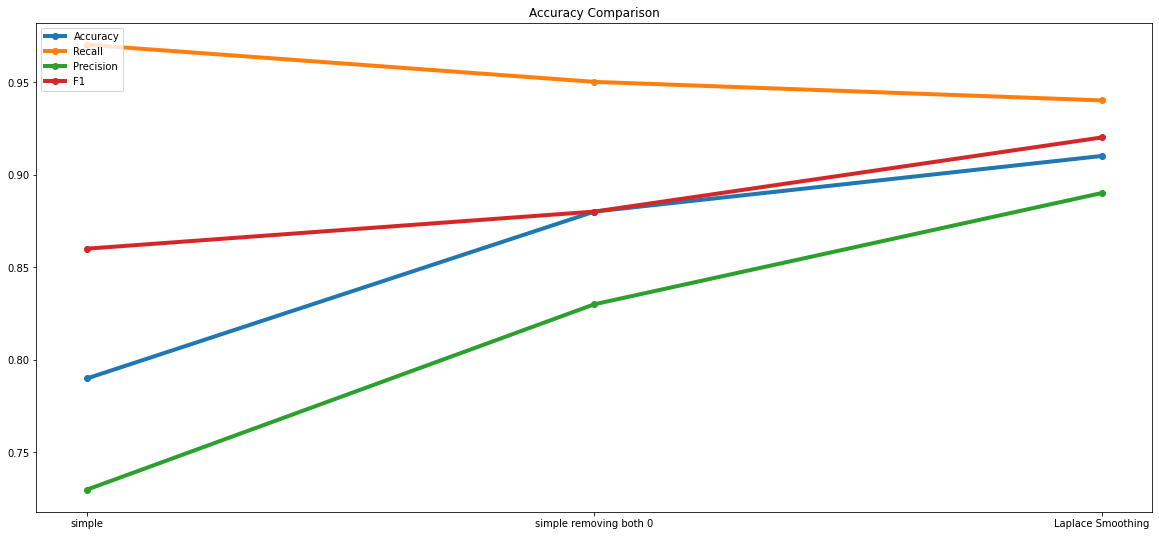

In [259]:
import matplotlib.pyplot as plt

accuracy = [0.79, 0.88, 0.91]
recall = [0.97, 0.95, 0.94]
precision = [0.73, 0.83, 0.89]
F1 = [ 0.86 ,0.88 , 0.92]
x = ["simple", "simple removing both 0", "Laplace Smoothing"]
line_width = 4

plt.figure(figsize=(20, 9))
plt.plot(x, accuracy, '-o', label="Accuracy", linewidth=line_width)
plt.plot(x, recall, '-o', label="Recall", linewidth=line_width)
plt.plot(x, precision, '-o', label="Precision", linewidth=line_width)
plt.plot(x, F1, '-o', label="F1", linewidth=line_width)

plt.title("Accuracy Comparison")
#plt.xlabel("1: simple\n2: simple removing both 0\n3: Laplace Smoothing")
#plt.ylabel(".")
plt.legend(loc="upper left")
plt.show()
